In [2]:
%pip install matplotlib geopandas seaborn scipy

     ---------------------------------------- 7.2/7.2 MB 8.9 MB/s eta 0:00:00
     ---------------------------------------- 1.1/1.1 MB 11.1 MB/s eta 0:00:00
     -------------------------------------- 288.2/288.2 kB 9.0 MB/s eta 0:00:00
     -------------------------------------- 163.6/163.6 kB 9.6 MB/s eta 0:00:00
     ---------------------------------------- 55.3/55.3 kB ? eta 0:00:00
     ------------------------------------- 965.4/965.4 kB 10.3 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 11.3 MB/s eta 0:00:00
     ---------------------------------------- 21.7/21.7 MB 9.5 MB/s eta 0:00:00
     ---------------------------------------- 1.4/1.4 MB 9.7 MB/s eta 0:00:00
     ---------------------------------------- 4.8/4.8 MB 7.5 MB/s eta 0:00:00
     ---------------------------------------- 96.6/96.6 kB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
## Importação dos pacotes geopandas e matplotlib
import matplotlib.pyplot as plt
import geopandas
import seaborn as sns
%matplotlib inline
## Leitura do arquivo com as informações dos imóveis rurais
path = '../data/imoveis_rurais.geojson'
df = geopandas.read_file(path)

In [2]:
## Informações sobre o conteúdo do arquivo
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   COD_IMOVEL  736 non-null    object  
 1   NUM_AREA    736 non-null    float64 
 2   COD_ESTADO  736 non-null    object  
 3   NOM_MUNICI  736 non-null    object  
 4   NUM_MODULO  736 non-null    float64 
 5   TIPO_IMOVE  736 non-null    object  
 6   SITUACAO    736 non-null    object  
 7   CONDICAO_I  736 non-null    object  
 8   geometry    736 non-null    geometry
dtypes: float64(2), geometry(1), object(6)
memory usage: 51.9+ KB


In [3]:
df.rename(columns={'NUM_AREA':'Área(ha)'}, inplace=True)

<AxesSubplot: >

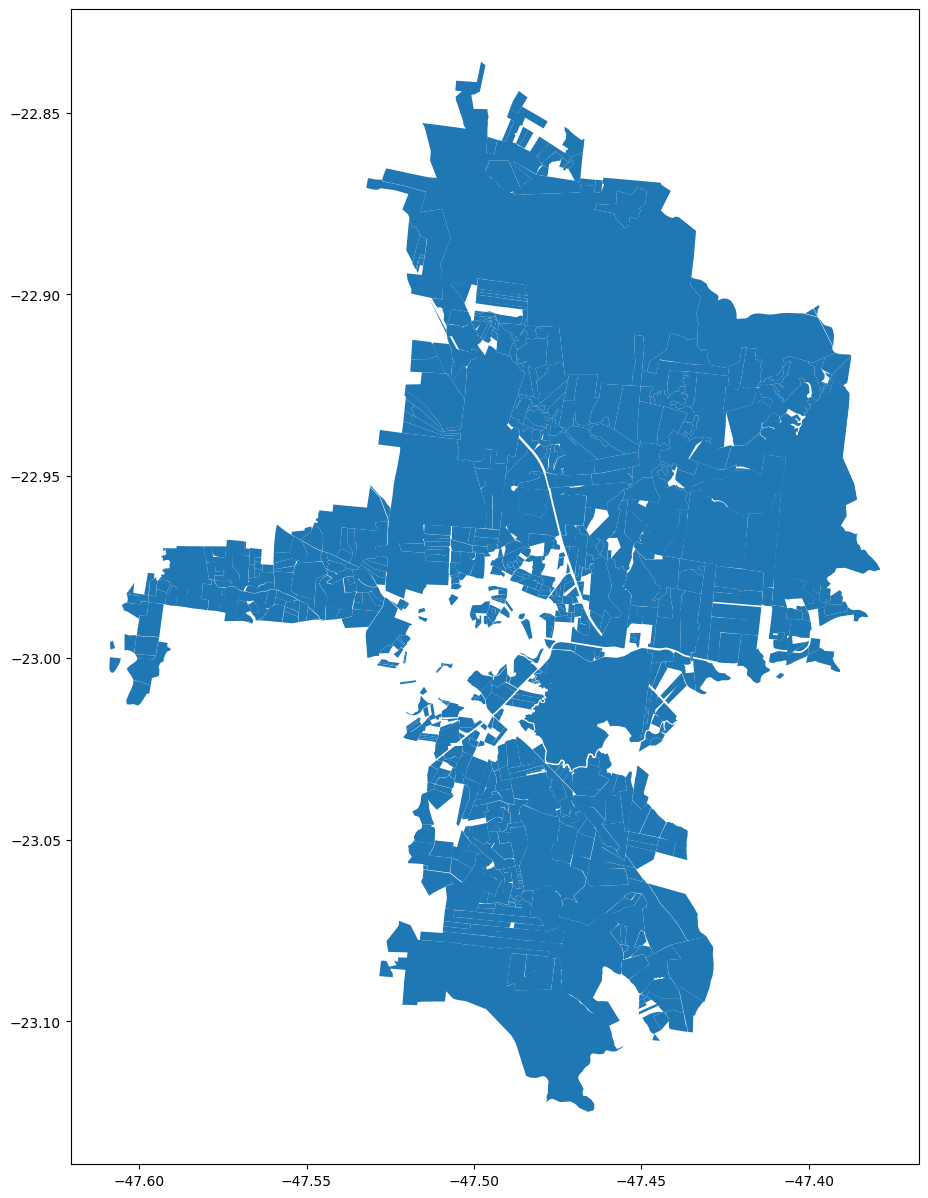

In [4]:
df.plot(figsize=(30,15))

In [5]:
df['Tamanho'] = 'Grande'
df.loc[df['Área(ha)'] <= 40, 'Tamanho'] = 'Pequena'
df.loc[(df['Área(ha)'] > 40) & (df['Área(ha)'] <= 150),'Tamanho'] = 'Média'

In [67]:
qdes = df.groupby('Tamanho')['Tamanho'].count()
qdes

Tamanho
Grande      24
Média      115
Pequena    597
Name: Tamanho, dtype: int64

In [65]:
percs = round(100 * qdes / sum(qdes), 2)
percs

Tamanho
Grande      3.26
Média      15.62
Pequena    81.11
Name: Tamanho, dtype: float64

In [69]:
percs = percs.apply(lambda x: f"{x}%")
percs

Tamanho
Grande      3.26%
Média      15.62%
Pequena    81.11%
Name: Tamanho, dtype: object

In [88]:
labels = qdes.astype('str') + ' (' + percs + ')'
labels = labels.index + 's: ' + labels
labels

Tamanho
Grande        Grandes: 24 (3.26%)
Média        Médias: 115 (15.62%)
Pequena    Pequenas: 597 (81.11%)
Name: Tamanho, dtype: object

[]

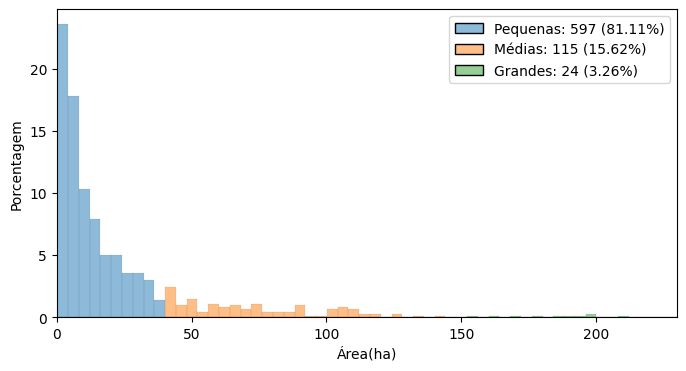

In [92]:
import matplotlib.patheffects as pe

plt.figure(figsize=(8,4))
g = sns.histplot(df, x='Área(ha)', stat='percent', hue='Tamanho', binwidth=4)
g.set_xlim(0, 230)
# g.axvline(40, color=sns.color_palette('pastel')[0])
# g.axvline(150, color=sns.color_palette('pastel')[1])
g.set_ylabel("Porcentagem")
# g.text(20,20,sum(df['Tamanho'] == 'Pequena'), rotation='vertical', ha='center', va='center')
# g.text(95,20,sum(df['Tamanho'] == 'Média'), rotation='vertical', ha='center', va='center')
# g.text(900,20,sum(df['Tamanho'] == 'Grande'), rotation='vertical', ha='center', va='center')
g.legend_.set_title('')
[ii.set_text(labels[ii.get_text()]) for ii in g.legend_.texts]
g.plot()

[]

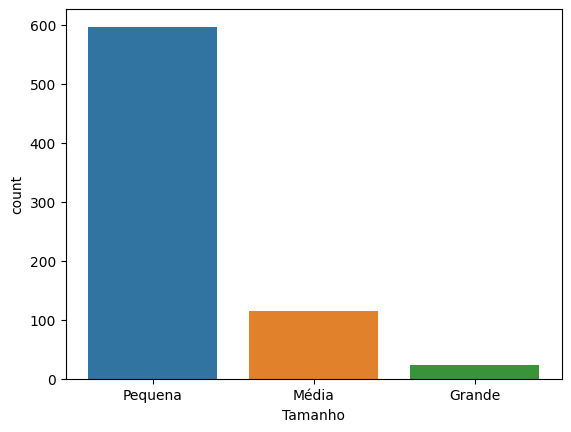

In [37]:
g = sns.countplot(df, x="Tamanho")
g.plot()

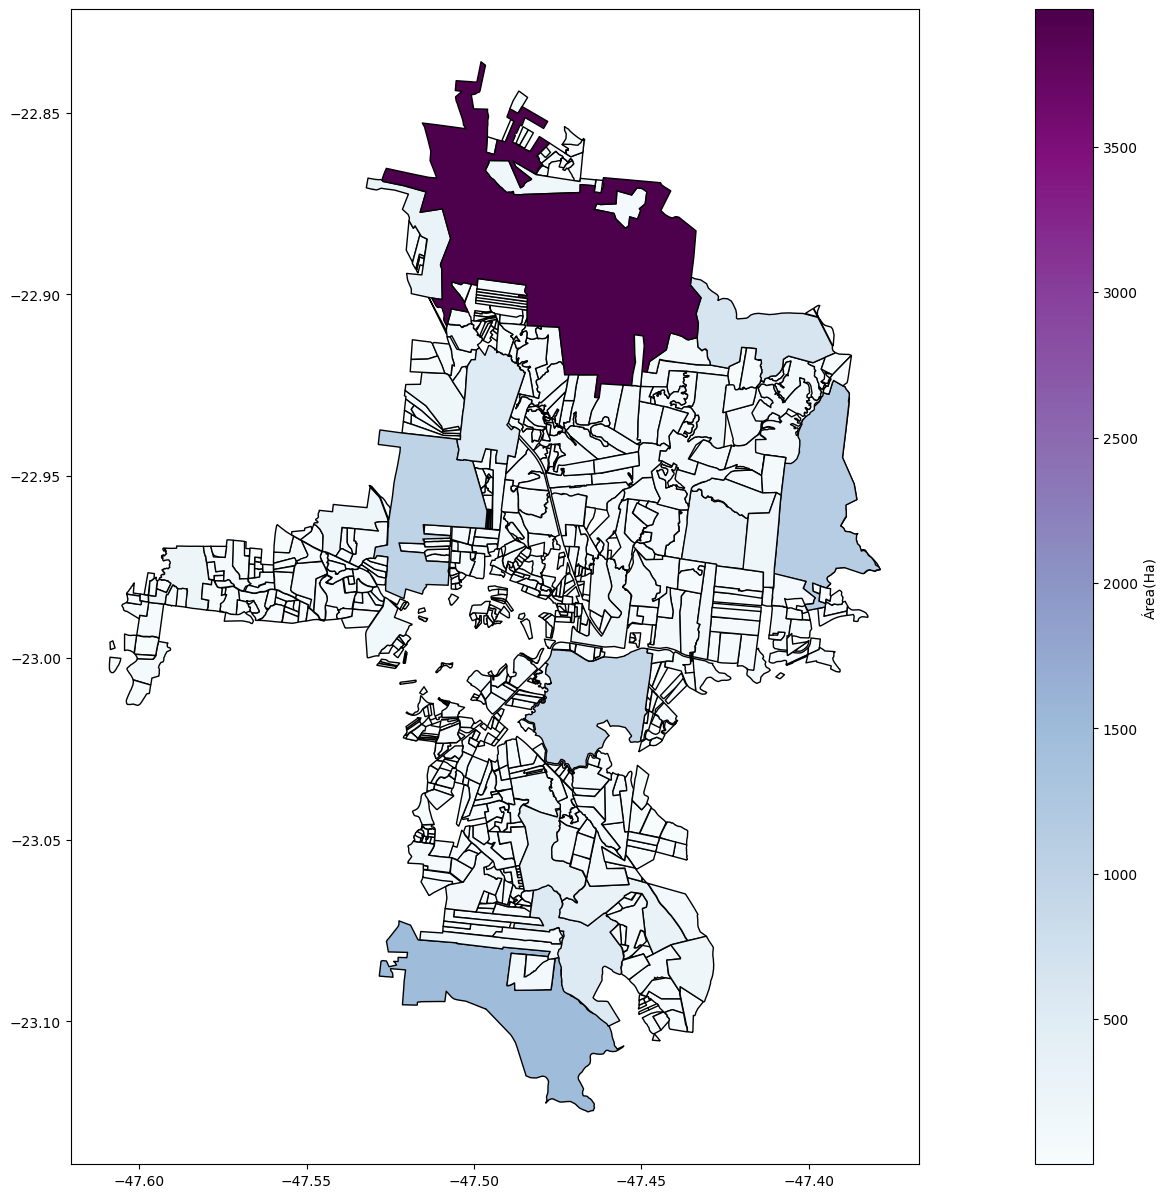

In [36]:
df.plot(column='Ha', cmap='BuPu', edgecolor='k', legend=True, figsize=(30,15),legend_kwds={'label': "Área(Ha)",
    'orientation': "vertical"})
plt.savefig('capivari.png')

In [18]:
df['tipo'] = 'NaN'
for index, row in df.iterrows():
    if row['Área(ha)'] <= 40:
        df.loc[index,'tipo'] =  str("Pequenas Propriedades")  
    if ((row['Área(ha)'] > 40) and (row['Área(ha)'] <=150)):
        df.loc[index,'tipo'] =  str("Médias Propriedades")  
    if row['Área(ha)'] > 150:
        df.loc[index,'tipo'] =  str("Grandes Propriedades")     


In [101]:
%pip install matplotlib_scalebar

Note: you may need to restart the kernel to use updated packages.


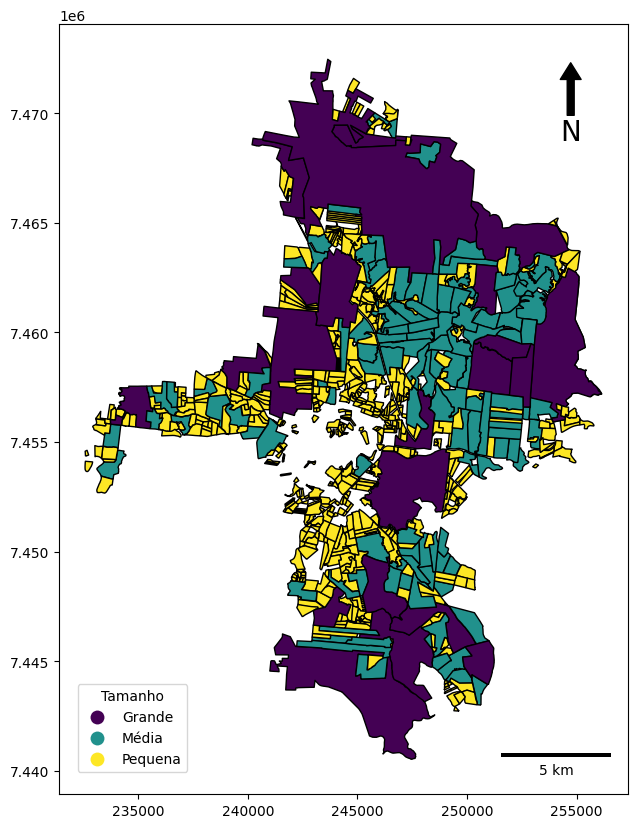

In [168]:
from matplotlib_scalebar.scalebar import ScaleBar

df = df.to_crs(31983)
g = df.plot(column='Tamanho', cmap='viridis', edgecolor='k', legend=True, figsize=(20,10), legend_kwds={'loc': 'lower left', 'bbox_to_anchor':(0.02, 0.02)})
g.legend_.set_title('Tamanho')
g.add_artist(ScaleBar(1, location='lower right', border_pad=1, width_fraction=0.005))
g.annotate('N', xy=(0.9, 0.95), xytext=(0.9, 0.86),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=g.transAxes)

plt.savefig('capivari2.pdf')